## other idea
remove duplicates using running time 
    -> problem because same movies have 1 minute difference in running time in the two data sets
try to use anoter dataset than basics that has things in common with our dataset for removal of duplicates

### Ideal
finding mapping between movie id

data set:
https://datasets.imdbws.com/

In [1]:
import pandas as pd
import numpy as np

In [3]:
movie = pd.read_csv("movie.metadata.tsv", delimiter='\t',header=None)
character = pd.read_csv("character.metadata.tsv", delimiter='\t',header=None)
movie.columns = ['Wikipedia movie ID','Freebase movie ID','Movie name','Movie release date','Movie box office revenue','Movie runtime','Movie languages','Movie countries','Movie genres']
movie["Movie name"] = movie["Movie name"].str.capitalize()
movie["Movie name"] = movie["Movie name"].str.replace(r'[éè]', 'e', regex=True)

In [4]:
# imdb1 has ratings, imdb identifier and number of votes
imdb1 = pd.read_csv('title.ratings (1).tsv', delimiter='\t')
# imdb2 has genres, title, year, etc
imdb2 = pd.read_csv('title.basics.tsv', delimiter='\t', low_memory=False)


In [80]:
merged_df = pd.merge(imdb1, imdb2, on='tconst', how='inner')

In [81]:
# in the imdb data set they include series and a lot of other things.
#  This removes a lot of movies that are not in the other data 
merged_2 = merged_df[(merged_df.titleType == 'movie')|(merged_df.titleType == 'tvMovie')]
# removing all the movies that have less than 30 votes 
# questionable step because some of the movies in our data set have 
# very low amount of votes
merged_3= merged_2[merged_2['numVotes'] >= 30]
# making the titles of the movies in the same format for both data set 
# for example in one data set a movie can be called "The matrix" and in the other "The Matrix"
merged_3.loc[:, 'primaryTitle'] = merged_3['primaryTitle'].str.capitalize()

In [82]:
# removing all the columns that are not needed
merged_4 = merged_3.drop(columns=['numVotes' ,'titleType', 'isAdult', 'endYear', 'originalTitle', 'runtimeMinutes', 'genres', 'tconst'])

In [161]:
# merging the data sets on our movie data set
merged_final = pd.merge(merged_4, movie, left_on='primaryTitle', right_on='Movie name', how='right')

In [162]:
# creating a column that has the year of the movie release so that we can remove duplicates 
# that have the same name but different release year
merged_final["Movie release year"] = merged_final["Movie release date"].str[:4]

In [163]:
# trying to remove duplicates
merged_final2 = merged_final[merged_final['Movie release year']==merged_final['startYear']]
# drop colllumn that are not needed
merged_final2 = merged_final2.drop(columns=['primaryTitle', 'startYear', 'Movie release date'])
merged_final2 = merged_final2[merged_final2['Movie box office revenue'].notna()]

# The best data right now

In [164]:
merged_final2 = merged_final2.drop(merged_final2[merged_final2['Movie box office revenue'].isnull()].index)
merged_final2

,averageRating,Wikipedia movie ID,Freebase movie ID,Movie name,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Movie release year
0,4.9,975900,/m/03vyhn,Ghosts of mars,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001
9,6.8,10408933,/m/02qc0j7,Alexander's ragtime band,3600000.0,106.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/04t36"": ""Musical"", ""/m/01z4y"": ""Comedy"", ...",1938
17,7.5,171005,/m/016ywb,Henry v,10161099.0,137.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/04xvh5"": ""Costume drama"", ""/m/082gq"": ""Wa...",1989
21,7.8,77856,/m/0kcn7,Mary poppins,102272727.0,139.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0hj3myq"": ""Children's/Family"", ""/m/04t36""...",1964
35,6.5,156558,/m/014k4y,Baby boy,29381649.0,123.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",2001
...,...,...,...,...,...,...,...,...,...,...
122368,6.9,1191380,/m/04f_y7,Wilde,2158775.0,118.0,"{""/m/02h40lc"": ""English Language""}","{""/m/014tss"": ""Kingdom of Great Britain"", ""/m/...","{""/m/0hn10"": ""LGBT"", ""/m/017fp"": ""Biography"", ...",1997
122369,7.1,54540,/m/0f7hw,Coming to america,288752301.0,117.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06cvj"": ""Romantic comedy"", ""/m/03p5xs"": ""...",1988
122421,5.3,7761830,/m/0kvgqb,Spaced invaders,15369573.0,100.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0hj3mt0"": ""Alien Film"", ""/m/06n90"": ""Scie...",1990
122426,6.7,1918494,/m/0660qx,State and main,6944471.0,106.0,"{""/m/02bjrlw"": ""Italian Language"", ""/m/02h40lc...","{""/m/0f8l9c"": ""France"", ""/m/09c7w0"": ""United S...","{""/m/0gf28"": ""Parody"", ""/m/09n5t_"": ""Americana...",2000


In [16]:
merged_final['startYear'] = pd.to_numeric(merged_final['startYear'], errors='coerce').astype('Int64')

In [23]:
new_df = pd.read_csv('../TMDB_movie_dataset_v11.csv')
a = new_df['release_date'].sort_values()
a.head(20)

605343    1800-01-01
624984    1800-09-11
582978    1837-10-29
622507    1865-01-01
258167    1865-01-01
585754    1865-01-01
543661    1867-01-01
19164     1874-12-09
687533    1878-05-06
687602    1878-05-06
687541    1878-05-06
151690    1878-05-07
142346    1878-05-07
155417    1878-05-07
135629    1878-05-07
142345    1878-05-07
135625    1878-05-07
123084    1878-05-07
89849     1878-05-07
89851     1878-05-07
Name: release_date, dtype: object

In [75]:
inflation = pd.read_excel('CPI-US-Iflation.xlsx',header=None)
inflation.columns = ['Year','CPI']
inflation['rate'] = 1
inflation = inflation.drop(inflation[inflation['Year'] > 2020].index)
#calculate the currency rate
for i in range(len(inflation)):
    inf = 1
    for j in range(len(inflation)-1,i,-1):
        inf = (1 + inflation['CPI'].iloc[j]/100.0)*inf
    inflation['rate'].iloc[i] = inf

In [167]:
merged_final2['Movie release year'] = merged_final2['Movie release year'].astype('int')
inflation['Year'] = inflation['Year'].astype('int')
merged_final2 = pd.merge(inflation, merged_final2, left_on='Year', right_on='Movie release year', how='right').drop(columns=['CPI'])
merged_final2['Adjusted_Revenue'] = merged_final2['Movie box office revenue']*merged_final2['rate']

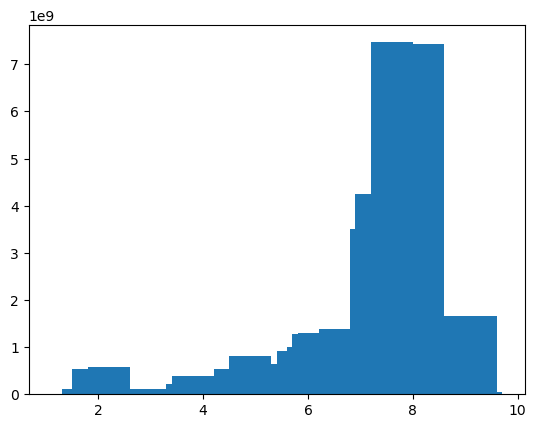

In [168]:
import seaborn as sns
import matplotlib.pyplot as plt
data = sns.load_dataset("tips")  # Seaborn自带的示例数据集
plt.bar(merged_final2['averageRating'], merged_final2['Adjusted_Revenue'])
plt.show()

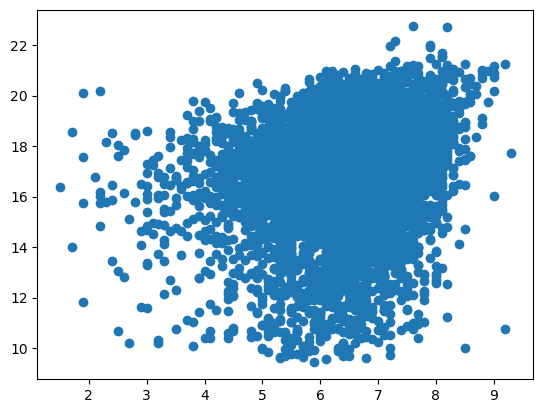

In [170]:
merged_final2['logMovieboxofficerevenue'] = np.log1p(merged_final2['Adjusted_Revenue'])
merged_final2.drop(merged_final2[merged_final2['logMovieboxofficerevenue'].isnull()].index, inplace=True)
plt.scatter(merged_final2['averageRating'], merged_final2['logMovieboxofficerevenue'])
plt.show()

In [171]:
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
model = smf.ols(formula='logMovieboxofficerevenue ~ averageRating', data=merged_final2).fit(cov_type='HC2')
print(model.summary())

                               OLS Regression Results                               
Dep. Variable:     logMovieboxofficerevenue   R-squared:                       0.042
Model:                                  OLS   Adj. R-squared:                  0.042
Method:                       Least Squares   F-statistic:                     289.9
Date:                      Sun, 10 Nov 2024   Prob (F-statistic):           8.43e-64
Time:                              15:02:00   Log-Likelihood:                -15747.
No. Observations:                      7439   AIC:                         3.150e+04
Df Residuals:                          7437   BIC:                         3.151e+04
Df Model:                                 1                                         
Covariance Type:                        HC2                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------

In [197]:
model.bse[1]

C:\Users\Mao\AppData\Local\Temp\ipykernel_8952\930849812.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  model.bse[1]


0.025626484562810446

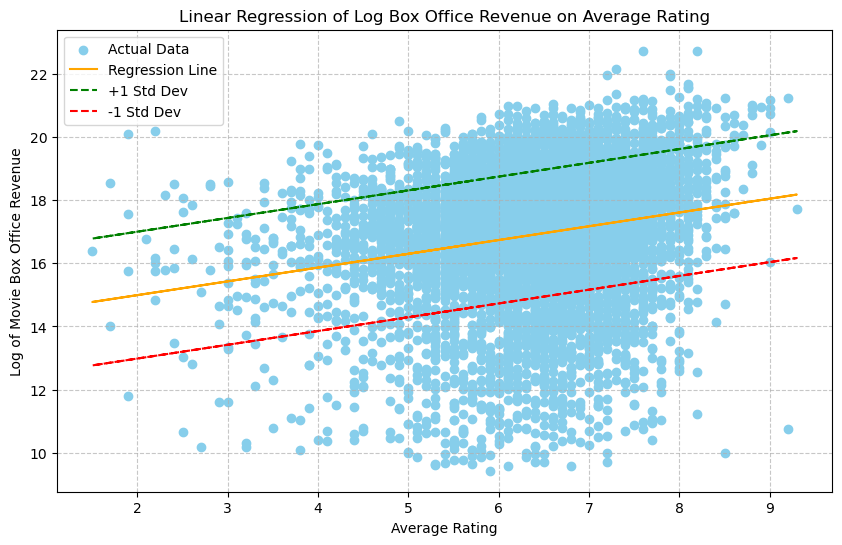

In [198]:
coefficients = model.params
# 预测值
predictions = model.predict()
std_dev = np.std(predictions - merged_final2['logMovieboxofficerevenue'])
# 绘制散点图和回归线
plt.figure(figsize=(10, 6))
plt.scatter(merged_final2['averageRating'], merged_final2['logMovieboxofficerevenue'], color='skyblue', label='Actual Data')
plt.plot(merged_final2['averageRating'], predictions, color='orange', label='Regression Line')
plt.plot(merged_final2['averageRating'], predictions + std_dev, color='green', linestyle='--', label='+1 Std Dev')
plt.plot(merged_final2['averageRating'], predictions - std_dev, color='red', linestyle='--', label='-1 Std Dev')
plt.xlabel('Average Rating')
plt.ylabel('Log of Movie Box Office Revenue')
plt.title('Linear Regression of Log Box Office Revenue on Average Rating')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [249]:
residuals = merged_final2['logMovieboxofficerevenue'] - predictions
outliers = merged_final2[np.abs(residuals) > std_dev]['logMovieboxofficerevenue']
print(outliers.count())
higher = merged_final2[residuals > std_dev].copy()
lower = merged_final2[residuals < -std_dev].copy()
print('length of higher:',len(higher),'length of lower:',len(lower))

2107
length of higher: 1024 length of lower: 1083


In [250]:
import json
higher['Movie genres'] = higher['Movie genres'].apply(lambda x: list(json.loads(x).values()))
higher['Movie languages'] = higher['Movie languages'].apply(lambda x: list(json.loads(x).values()))
higher['Movie countries'] = higher['Movie countries'].apply(lambda x: list(json.loads(x).values()))
lower['Movie genres'] = lower['Movie genres'].apply(lambda x: list(json.loads(x).values()))
lower['Movie languages'] = lower['Movie languages'].apply(lambda x: list(json.loads(x).values()))
lower['Movie countries'] = lower['Movie countries'].apply(lambda x: list(json.loads(x).values()))

In [254]:
higher.loc[:, 'First genre'] = higher['Movie genres'].apply(lambda x: x[0])
higher.loc[:, 'Second genre'] = higher['Movie genres'].apply(lambda x: x[1] if len(x) > 1 else None)
higher.loc[:, 'Third genre'] = higher['Movie genres'].apply(lambda x: x[2] if len(x) > 2 else None)

In [305]:
First_t10 = higher['First genre'].value_counts()
Second_t10 = higher['Second genre'].value_counts()
Third_t10 = higher['Third genre'].value_counts()
all_genres = pd.concat([higher['First genre'], higher['Second genre'], higher['Third genre']])
All_t10 = all_genres.value_counts().head(10)
All_t10

Thriller            337
Adventure           217
Crime Fiction       157
Science Fiction     154
Action/Adventure    135
Drama               130
Romantic comedy     118
Comedy              116
Romance Film        115
Action              108
Name: count, dtype: int64

In [306]:
data = np.zeros((len(set(All_t10)),3))
i = 0
for genre in All_t10.index:
    data[i,0] = First_t10.get(genre, 0)
    data[i,1] = Second_t10.get(genre, 0)
    data[i,2] = Third_t10.get(genre, 0)
    i = i + 1

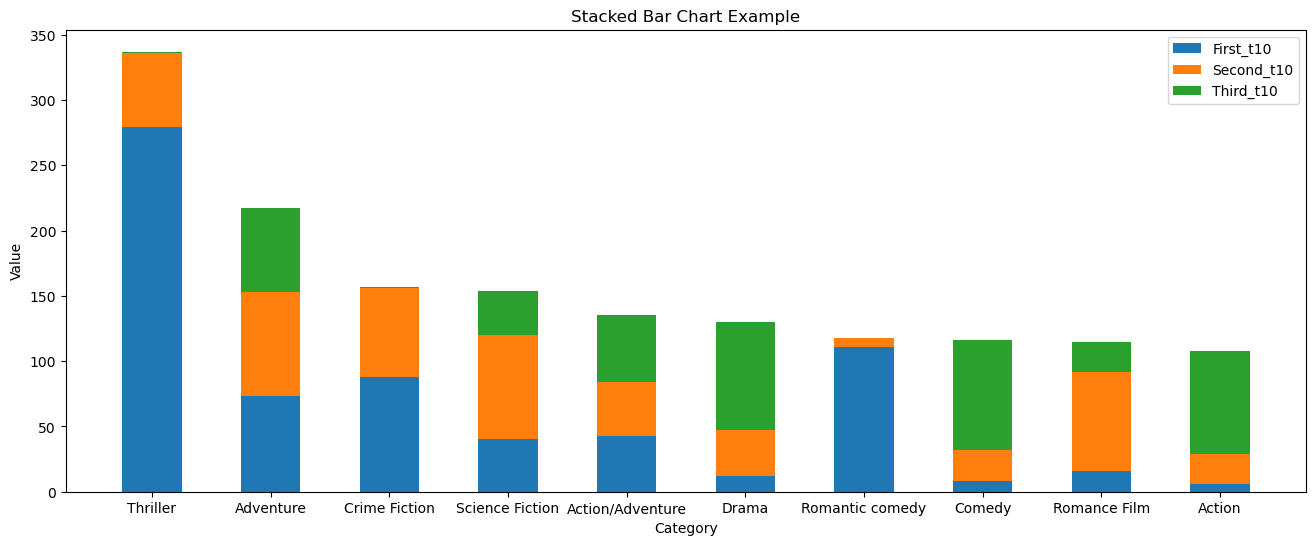

In [316]:
# 示例数据
categories = All_t10.index
subcategories = ['First_t10', 'Second_t10', 'Third_t10']

# 设置柱宽和偏移量
bar_width = 0.5
index = np.arange(len(categories))
plt.figure(figsize=(16, 6))
# 绘制每个分层的数据
for i in range(len(subcategories)):
    plt.bar(index, data[:, i], bar_width, label=subcategories[i], bottom=np.sum(data[:, :i], axis=1))

# 添加标签和标题
plt.xlabel('Category')
plt.ylabel('Value')
plt.title('Stacked Bar Chart Example')
plt.xticks(index, categories)
plt.legend()

plt.show()

In [237]:
higher['Number of genres'] = higher['Movie genres'].apply(lambda x: len(x) if isinstance(x, list) else 0)
higher['Number of genres'][higher['Number of genres']>3].count()

C:\Users\Mao\AppData\Local\Temp\ipykernel_8952\3678615329.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  higher['Number of genres'] = higher['Movie genres'].apply(lambda x: len(x) if isinstance(x, list) else 0)


896

In [232]:
# 将 'Movie genres' 列中的每个列表展开成单独的行
genres_expanded = higher['Movie genres'].explode()
# 统计每个电影类型的出现次数
genre_counts = genres_expanded.value_counts()
# 输出统计结果
print(genre_counts)


Movie genres
Comedy                        460
Action                        419
Drama                         398
Thriller                      355
Action/Adventure              313
                             ... 
Political satire                1
Parkour in popular culture      1
Splatter film                   1
Science fiction Western         1
Prison film                     1
Name: count, Length: 225, dtype: int64


In [190]:
# x=merged_final2['averageRating']
# x = (x -x.mean())/x.std()
# y=merged_final2['logMovieboxofficerevenue']
# y = (y -y.mean())/y.std()
# plt.hist(merged_final2['averageRating'])
# up=merged_final2['averageRating'].mean() + merged_final2['averageRating'].std()
# low=merged_final2['averageRating'].mean() - merged_final2['averageRating'].std()
# plt.hist(merged_final2['averageRating'])
# # Create an array of y values
# y = np.linspace(-10, 3000, 400)

# # Plot the vertical line x = 1
# plt.plot(up*np.ones_like(y), y, label="x = 1", color='red')
# plt.plot(low*np.ones_like(y), y, label="x = 1", color='red')
# merged_final2['averageRating'][(merged_final2['averageRating'] < up) & (merged_final2['averageRating'] > low)].count()
# merged_final2['averageRating']

In [189]:
# from sklearn.cluster import KMeans
# x=merged_final2['averageRating']
# x = (x -x.mean())/x.std()
# y=merged_final2['logMovieboxofficerevenue']
# y = (y -y.mean())/y.std()
# merged_final2['averageRating'] = (x - np.min(x)) / (np.max(x) - np.min(x))
# merged_final2['logMovieboxofficerevenue'] = (y - np.min(y)) / (np.max(y) - np.min(y))
# data = np.column_stack((x, y))
# #elbow
# sse = []
# k_range = range(1, 11)  
# for k in k_range:
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     kmeans.fit(data)
#     sse.append(kmeans.inertia_)  
# plt.plot(k_range, sse, marker='o')
# plt.title('Elbow Method for Optimal k')
# plt.xlabel('Number of Clusters (k)')
# plt.ylabel('SSE (Inertia)')
# plt.show()

In [188]:
# kmeans = KMeans(n_clusters=4, random_state=42)  
# merged_final2['cluster'] = kmeans.fit_predict(data)  
# plt.figure(figsize=(8, 6))
# sns.scatterplot(x='averageRating', y='logMovieboxofficerevenue', hue='cluster', palette='Set1', data=merged_final2, s=100, edgecolor='black', marker='o')
# plt.title('K-means Clustering of 2D Data')
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.legend(title='Cluster')
# plt.show()